In [1]:
import requests

# My URL and headers (used rapid api website and movies based data)
url = "https://streaming-availability.p.rapidapi.com/countries"
headers = {
    "X-RapidAPI-Key": "8061d144dfmsh774995b2e2872b6p1bf18ejsnba58c382ff31",
    "X-RapidAPI-Host": "streaming-availability.p.rapidapi.com"
}

# Sending a GET request to the API
response = requests.get(url, headers=headers)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing my JSON response
    data = response.json()

    #  sample dashboard
    def display_sample_dashboard(data, sample_countries=3, sample_services=2):
        print("Streaming Availability Sample Dashboard")
        print("----------------------------------------")
        total_countries = len(data.get("result", {}))
        print("Total Countries:", total_countries)

        displayed_countries = 0
        displayed_services = 0

        for country_code, country_data in data.get("result", {}).items():
            print("Country Code:", country_code)
            print("Country Name:", country_data.get("name", ""))
            print("Services:")
            for service_id, service_data in country_data.get("services", {}).items():
                print("\tService ID:", service_id)
                print("\tService Name:", service_data.get("name", ""))
                print("\tHomepage:", service_data.get("homePage", ""))
                print("\tTheme Color Code:", service_data.get("themeColorCode", ""))
                print("\tLight Theme Image:", service_data.get("images", {}).get("lightThemeImage", ""))
                print("\tDark Theme Image:", service_data.get("images", {}).get("darkThemeImage", ""))
                print("\tWhite Image:", service_data.get("images", {}).get("whiteImage", ""))
                print("\tSupported Streaming Types:")
                streaming_types = service_data.get("supportedStreamingTypes", {})
                print("\t\tAddon:", streaming_types.get("addon", False))
                print("\t\tBuy:", streaming_types.get("buy", False))
                print("\t\tRent:", streaming_types.get("rent", False))
                print("\t\tFree:", streaming_types.get("free", False))
                print("\t\tSubscription:", streaming_types.get("subscription", False))
                print("\tAddons:")
                for addon_id, addon_data in service_data.get("addons", {}).items():
                    print("\t\tAddon ID:", addon_id)
                    print("\t\tAddon Name:", addon_data.get("displayName", ""))
                    print("\t\tAddon Homepage:", addon_data.get("homePage", ""))
                    print("\t\tAddon Theme Color Code:", addon_data.get("themeColorCode", ""))
                    print("\t\tAddon Image:", addon_data.get("image", ""))
                print("---------------------------------")

                displayed_services += 1
                if displayed_services >= sample_services:
                    break

            displayed_countries += 1
            if displayed_countries >= sample_countries:
                break

    # Calling the display_sample_dashboard function
    display_sample_dashboard(data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)


Streaming Availability Sample Dashboard
----------------------------------------
Total Countries: 59
Country Code: ae
Country Name: United Emirates
Services:
	Service ID: apple
	Service Name: Apple TV
	Homepage: https://tv.apple.com/ae
	Theme Color Code: #000000
	Light Theme Image: https://media.movieofthenight.com/services/apple/logo-light-theme.svg
	Dark Theme Image: https://media.movieofthenight.com/services/apple/logo-dark-theme.svg
	White Image: https://media.movieofthenight.com/services/apple/logo-white.svg
	Supported Streaming Types:
		Addon: True
		Buy: True
		Rent: True
		Free: False
		Subscription: True
	Addons:
		Addon ID: tvs.sbd.10000
		Addon Name: Hulu
		Addon Homepage: https://tv.apple.com/us/channel/hulu/tvs.sbd.10000
		Addon Theme Color Code: #29A869
		Addon Image: 
		Addon ID: tvs.sbd.1000023
		Addon Name: Viki
		Addon Homepage: https://tv.apple.com/us/channel/viki/tvs.sbd.1000023
		Addon Theme Color Code: #0c9bff
		Addon Image: 
		Addon ID: tvs.sbd.1000027
		Addon Na

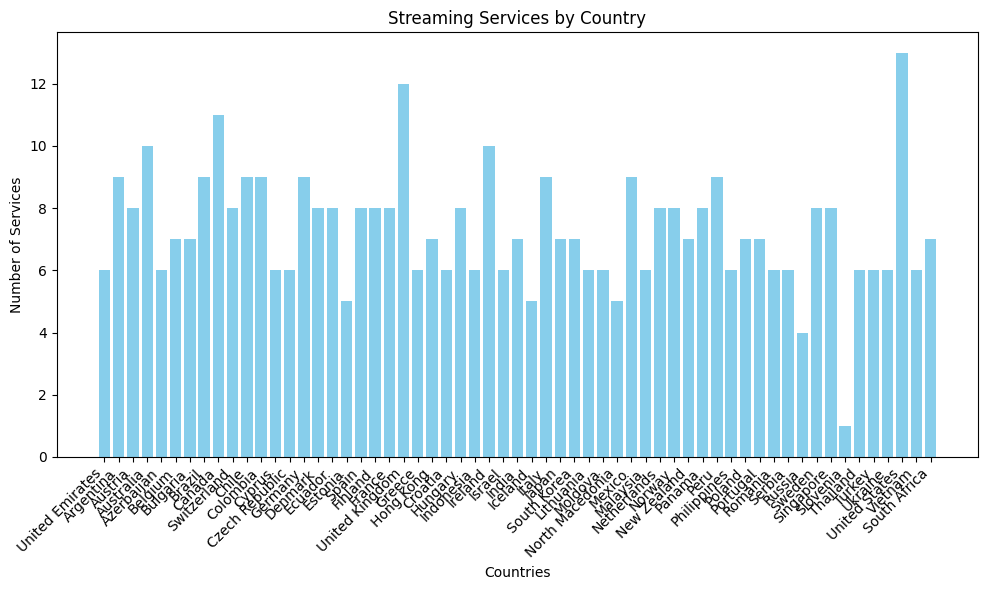

In [2]:
import matplotlib.pyplot as plt

# Function to generate a bar chart for streaming services by country
def bar_chart_services_by_country(data):
    countries = []
    num_services = []

    for country_code, country_data in data.get("result", {}).items():
        countries.append(country_data.get("name", ""))
        num_services.append(len(country_data.get("services", {})))

    plt.figure(figsize=(10, 6))
    plt.bar(countries, num_services, color='skyblue')
    plt.xlabel('Countries')
    plt.ylabel('Number of Services')
    plt.title('Streaming Services by Country')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calling the function to generate the bar chart
bar_chart_services_by_country(data)


In [4]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.7 MB/s eta 0:00:00


In [5]:
import dash
from dash import dcc, html
import plotly.graph_objs as go

# Initializing the Dash app
app = dash.Dash(__name__)

def bar_chart_services_by_country(data):
    countries = []
    num_services = []

    for country_code, country_data in data.get("result", {}).items():
        countries.append(country_data.get("name", ""))
        num_services.append(len(country_data.get("services", {})))

    # Creating a bar chart figure
    figure = {
        'data': [
            go.Bar(x=countries, y=num_services, marker=dict(color='skyblue'))
        ],
        'layout': {
            'title': 'Streaming Services by Country',
            'xaxis': {'title': 'Countries'},
            'yaxis': {'title': 'Number of Services'},
            'margin': {'l': 40, 'b': 40, 't': 40, 'r': 40},
            'plot_bgcolor': '#f7f7f7',
            'paper_bgcolor': '#f7f7f7'
        }
    }
    return figure

#  generating a pie chart for streaming types distribution
def pie_chart_streaming_types(data):
    streaming_types_count = {
        'Addon': 0,
        'Buy': 0,
        'Rent': 0,
        'Free': 0,
        'Subscription': 0
    }

    # Iterating through the data to count streaming types
    for country_code, country_data in data.get("result", {}).items():
        for service_id, service_data in country_data.get("services", {}).items():
            streaming_types = service_data.get("supportedStreamingTypes", {})
            for streaming_type, supported in streaming_types.items():
                if supported:
                    # Incrementing the count for the respective streaming type
                    streaming_types_count[streaming_type.capitalize()] += 1

    labels = list(streaming_types_count.keys())
    sizes = list(streaming_types_count.values())

    # Creating the pie chart figure
    figure = {
        'data': [
            go.Pie(labels=labels, values=sizes, hole=0.3)
        ],
        'layout': {
            'title': 'Streaming Types Distribution'
        }
    }
    return figure

app.layout = html.Div([
    html.H1('Streaming Dashboard', style={'textAlign': 'center'}),

    html.Div([
        html.Div([
            dcc.Graph(id='bar-chart', figure=bar_chart_services_by_country(data))
        ], className='six columns'),
        html.Div([
            dcc.Graph(id='pie-chart', figure=pie_chart_streaming_types(data))
        ], className='six columns')
    ], className='row')
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>